In [136]:
# Get two figures for the radial map (original and transformed)

In [137]:
from jax import numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as onp

def cart2pol(x, y):
    '''
    From cartesian to polar coordinates
    '''
    rho = jnp.sqrt(x**2 + y**2)
    phi = jnp.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    '''
    From polar to cartesian coordinates
    '''
    x = rho * jnp.cos(phi)
    y = rho * jnp.sin(phi)
    return(x, y)

def identity(rho, phi):
    '''
    Identity
    '''
    return(rho, phi)

In [138]:
def plot_grid_x(x,y, ax=None, **kwargs):
# def plot_grid(x,y, ax=None):
    ax = ax or plt.gca()
    segs1 = jnp.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
#     ax.add_collection(LineCollection(segs1, edgecolors="black"))
    ax.add_collection(LineCollection(segs1, **kwargs))
#     ax.add_collection(LineCollection(segs2, edgecolors="black"))
#     ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()
    
def plot_grid_y(x,y, ax=None, **kwargs):
# def plot_grid(x,y, ax=None):
    ax = ax or plt.gca()
    segs1 = jnp.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
#     ax.add_collection(LineCollection(segs1, edgecolors="black"))
#     ax.add_collection(LineCollection(segs1, **kwargs))
#     ax.add_collection(LineCollection(segs2, edgecolors="black"))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()
    
def show_grid_plot(f, multi_argument=False, extremes_x=(0,1), extremes_y=(0,1),savefig=False, fname="grplot"):
    '''
    Plots how a regularly spaced grid in a 2d space is distorted under the action of the function f
    
    f: A mixing function
    multi_argument: A Boolean variable; checks whether f takes a (N,2) array as input, or two (N,) arrays.
                    In the latter case, internally builds a version of f which takes two (N,) arrays as input.
    '''
    
    if multi_argument==False:
        def f_grid(x, y):
            z = jnp.array([x, y])
            z_ = f(z)
            return z_[0], z_[1]
    else:
        f_grid = f

    bottom_x, top_x = extremes_x
    bottom_y, top_y = extremes_y
    
    fig, ax = plt.subplots()

    grid_x,grid_y = jnp.meshgrid(jnp.linspace(bottom_x,top_x,15),jnp.linspace(bottom_y,top_y,15))
#     plot_grid(grid_x,grid_y, ax=ax,  color="lightgrey")

#1A85FF
#D41159

    distx, disty = f_grid(grid_x,grid_y)
#     plot_grid(distx, disty, ax=ax)
    plot_grid_x(distx, disty, ax=ax, color="#1A85FF")
    plot_grid_y(distx, disty, ax=ax, color="#D41159")
 
#     plt.gca().set_aspect('equal', adjustable='box')
#     if savefig==True:
#         plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format=None,
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None, metadata=None)
#     plt.show()
    return fig, ax

In [139]:
import os

In [140]:
figure_path = "/Users/luigigresele/Documents/Plots_IMA"

In [141]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, Locator, FixedLocator

In [142]:
fontsize_math = 14
fontsize_ticks = 13

In [143]:
extremes_x=(0.7,1.5)
extremes_y=(-0.4,.4)

In [144]:
extremes_x=(0.5,1.5)
extremes_y=(-0.5,.5)

In [145]:
# # Roughly square observations plot
# extremes_x=(0.2,0.4)
# extremes_y=(-jnp.pi/12,jnp.pi/12)

<ipython-input-146-4905ec4d7a6f>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
<ipython-input-146-4905ec4d7a6f>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',


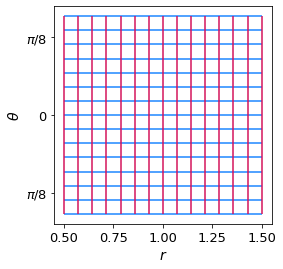

In [146]:
fname = os.path.join(figure_path,"source_grid.pdf")
fig, ax = show_grid_plot(identity, extremes_x=extremes_x, extremes_y=extremes_y, multi_argument=True)
# plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.xlabel(r"$r$", fontsize=fontsize_math)
plt.ylabel(r"$\theta$", fontsize=fontsize_math)
# ax.xaxis.set_major_locator(FixedLocator([0.5, 1.5]))
ax.yaxis.set_major_locator(FixedLocator([-jnp.pi/8, 0, jnp.pi/8]))
# ax.set_yticks(jnp.arange(-jnp.pi/8, jnp.pi/8))
labels = [r'$\pi/8$', r'$0$', r'$\pi/8$']
ax.set_yticklabels(labels)
ax.tick_params(labelsize = fontsize_ticks)
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None, metadata=None)
plt.show()

<ipython-input-147-93d7095cdf91>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
<ipython-input-147-93d7095cdf91>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',


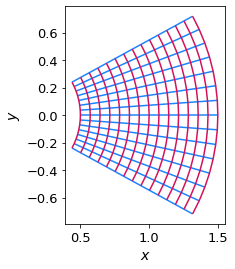

In [147]:
fname = os.path.join(figure_path,"observations_grid.pdf")
fig, ax = show_grid_plot(pol2cart, extremes_x=extremes_x, extremes_y=extremes_y, multi_argument=True)
plt.gca().set_aspect('equal', adjustable='box')
# plt.gca().set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.xlabel(r"$x$", fontsize=fontsize_math)
plt.ylabel(r"$y$", fontsize=fontsize_math)
ax.tick_params(labelsize = fontsize_ticks)
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None, metadata=None)
plt.show()